https://nbviewer.jupyter.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb

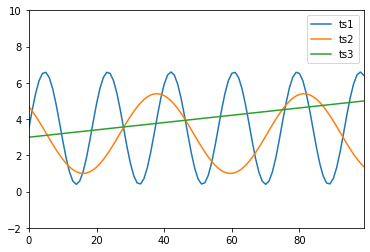

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

In [5]:
from math import sqrt
def euclid_dist(t1,t2):
    return sqrt(sum((t1-t2)**2))

In [10]:
euclid_dist(ts1,ts2), euclid_dist(ts1,ts3)

(26.959216037969345, 23.189249190311056)

23.189249190311056

In [37]:
from scipy.spatial.distance import euclidean
def DTWDistance1(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            # dist= (s1[i]-s2[j])**2
            # euclidean(ts1[0], ts2[0])  # allow vector form
            dist = euclidean(s1[i], s2[j])
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [38]:
DTWDistance1(ts1,ts2), DTWDistance1(ts1,ts3)

(12.021261169617128, 14.24159748412822)

In [39]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return sqrt(DTW[len(s1)-1, len(s2)-1])
DTWDistance(ts1,ts2,10), DTWDistance(ts1,ts3,10)

(18.59655183841726, 22.47248284679103)

In [40]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)
LB_Keogh(ts1,ts2,20), LB_Keogh(ts1,ts3,20)

(6.253892351594148, 19.959547869419758)

In [41]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [42]:
fastdtw(ts1, ts2)[0], fastdtw(ts1, ts3)[0]

(144.7581535264553, 206.59539301012927)

In [43]:
ts1.values

array([3.5       , 4.52416098, 5.43330853, 6.12534525, 6.52255531,
       6.58033196, 6.29218688, 5.69047881, 4.84277964, 3.84428612,
       2.80712922, 1.84778181, 1.07397874, 0.57261822, 0.40000311,
       0.5755181 , 1.07945284, 1.85521538, 2.81568748, 3.85300797,
       4.85068562, 5.69668107, 6.29598892, 6.5813068 , 6.52059347,
       6.12066705, 5.42643933, 4.5158722 , 3.49122246, 2.46755845,
       1.55983777, 0.8699976 , 0.47550709, 0.42066757, 0.71163754,
       1.31574102, 2.16513711, 3.1644385 , 4.20142349, 5.15963852,
       5.93147591, 6.43025819, 6.59997204, 6.42155858, 5.91505366,
       5.13733786, 4.17574877, 3.138273  , 2.14141923, 1.29713427,
       0.70023146, 0.41774307, 0.48139259, 0.88403216, 1.58044531,
       2.49242473, 3.517555  , 4.54071384, 5.44700037, 6.13463847,
       6.52640627, 6.57830821, 6.28451569, 5.67802164, 4.82693544,
       3.8268342 , 2.79002943, 1.83295445, 1.06308894, 0.5668889 ,
       0.40007767, 0.58138817, 1.09045921, 1.87012203, 2.83282

In [44]:
x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
x.shape

(5, 2)

In [45]:
x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [48]:
# Check with our manual calculation

DTWDistance1(x,y) **2

2.8284271247461907

In [46]:
from scipy.spatial.distance import euclidean
fastdtw(ts1,ts2, radius=10, dist=euclidean)[0]

144.51072010814457

In [49]:
DTWDistance1(ts1,ts2) ** 2

144.51072010814457